# Seaborn Tutorial

Seaborn é uma biblioteca para fazer gráficos estatísticos em Python



# Sites importantes e fontes
[seaborn docs](https://seaborn.pydata.org/tutorial/introduction.html)

[Anconda.org](https://anaconda.org)

# Visualizações Relacionadas a Estatistica

## Relacionando variáveis com gráficos de dispersão

O __gráfico de dispersão__ é um dos pilares da visualização estatística. Representa a distribuição conjunta de duas variáveis usando uma nuvem de pontos, onde cada ponto representa uma observação no conjunto de dados. Esta representação permite ao olho inferir uma quantidade substancial de informações sobre se existe alguma relação significativa entre eles.

Existem várias maneiras de desenhar um gráfico de dispersão(scatter plot) . A mais básica, que deve ser usada quando ambas as variáveis são numéricas, é a função ```scatterplot()```. No tutorial de visualização categórica, veremos ferramentas especializadas para usar gráficos de dispersão (scatterplot) para visualizar dados categóricos. O __scatterplot()__ é o tipo padrão em __relplot()__ (também pode ser forçado configurando ```kind="scatter"```):

In [1]:
# importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

### Dataset tips

__contexto:__Um garçom registrou informações sobre cada gorjeta que recebeu durante alguns meses trabalhando em um restaurante. Ao todo ele registrou 244 gorgetas.

* __total_bill__:  Valor da conta (dólares);
* __tip__: O valor da gorjeta (dólares);
* __sex__: Genero do pagador (neste caso femino ou masculino);
* __smoker__: Se a festa incluia fumantes;
* __day__: O dia da semana (quinta(Thur, sexta (Fri), sabado (Sat) ou domingo (Sun));
* __time__: Almoço ou Janta;
* __size__: Quantidade de pessoas na mesa

In [3]:
tips = sns.load_dataset('tips') # importanto o dataset tips (gordetas de carços US)
tips.sample(3)


,total_bill,tip,sex,smoker,day,time,size
228,13.28,2.72,Male,No,Sat,Dinner,2
56,38.01,3.00,Male,Yes,Sat,Dinner,4
207,38.73,3.00,Male,Yes,Sat,Dinner,4


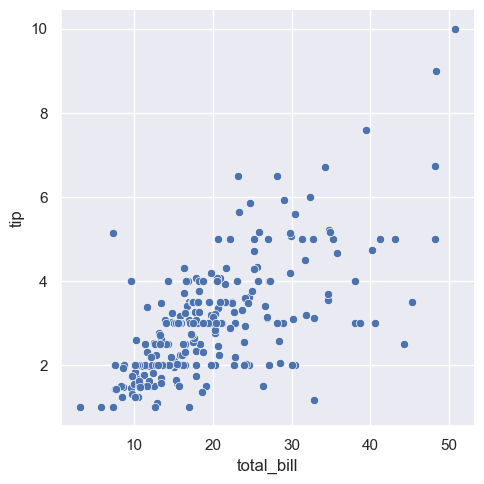

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip');

__Observação:__ Embora os pontos sejam plotados em duas dimensões, outra dimensão pode ser adicionada ao gráfico colorindo os pontos de acordo com uma terceira variável. Em seaborn, isso é chamado de ```“hue semantic”```, porque a cor do ponto ganha significado:

para muda a cor use o paramentro __hue__

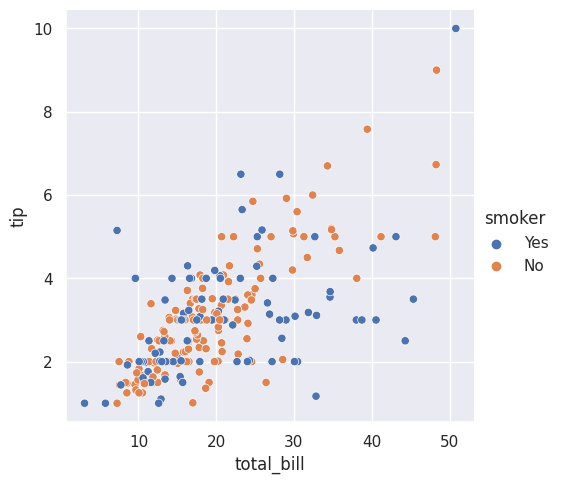

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker');

> Para enfatizar a diferença entre as classes e melhorar a acessibilidade, você pode usar um estilo de marcador diferente para cada classe: use __style__


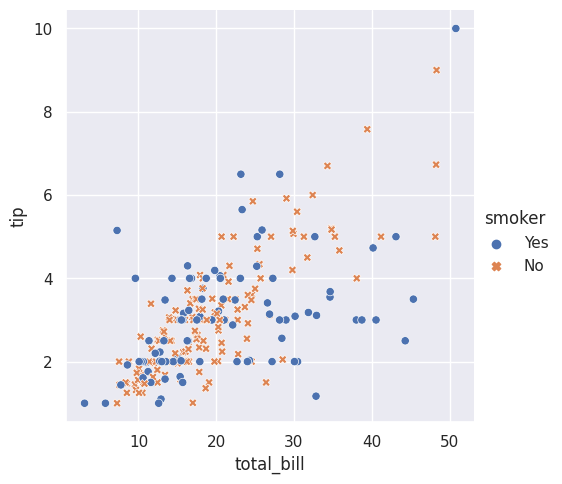

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', style='smoker')

> Também é possível representar quatro variáveis alterando o matiz e o estilo de cada ponto de forma independente. Mas isso deve ser feito com cuidado, pois o olho é muito menos sensível à forma do que à cor:

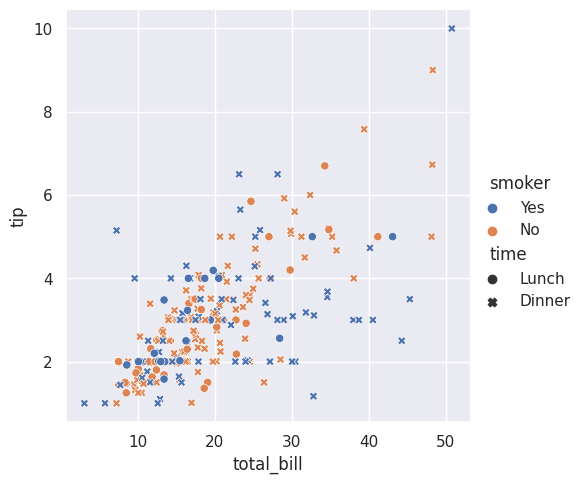

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', style='time')

> Nos exemplos acima, a semântica de matiz era categórica, portanto a paleta qualitativa padrão foi aplicada. Se a semântica de matiz for numérica (especificamente, se puder ser convertida em flutuante), a coloração padrão mudará para uma paleta sequencial:

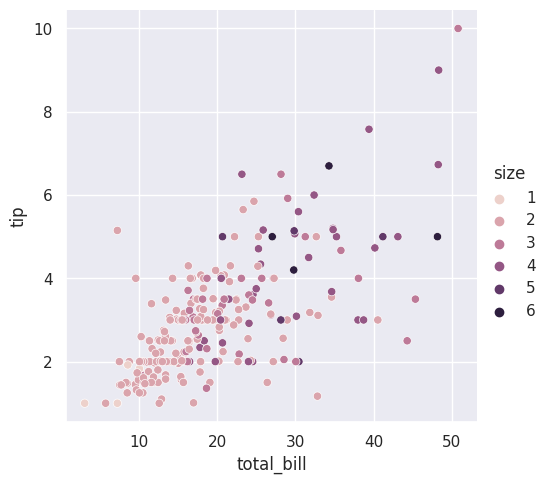

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='size' )

> Em ambos os casos, você pode personalizar a paleta de cores. Existem muitas opções para fazer isso. Aqui, personalizamos uma paleta sequencial usando a interface de string para ```cubehelix_palette()```:

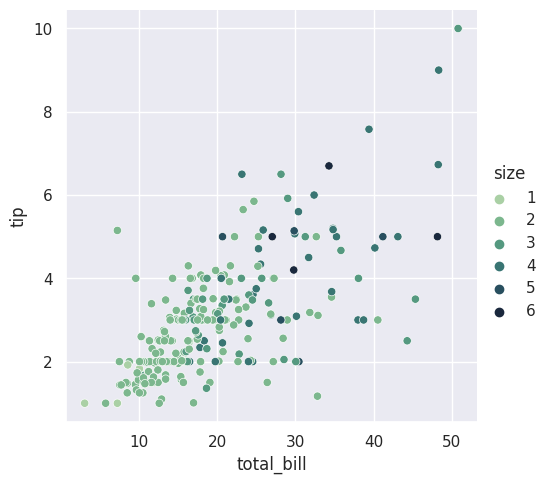

In [ ]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='size',
    palette='ch:r=-.5, l=.75'
)

> O terceiro tipo de variável semântica altera o tamanho de cada ponto:

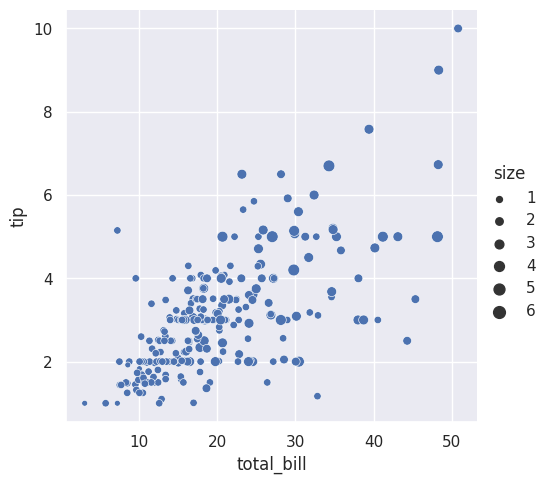

In [ ]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    size='size'
)

> Ao contrário de matplotlib.pyplot.scatter(), o valor literal da variável não é usado para escolher a área do ponto. Em vez disso, o intervalo de valores em unidades de dados é normalizado em um intervalo em unidades de área. Esta gama pode ser personalizada:

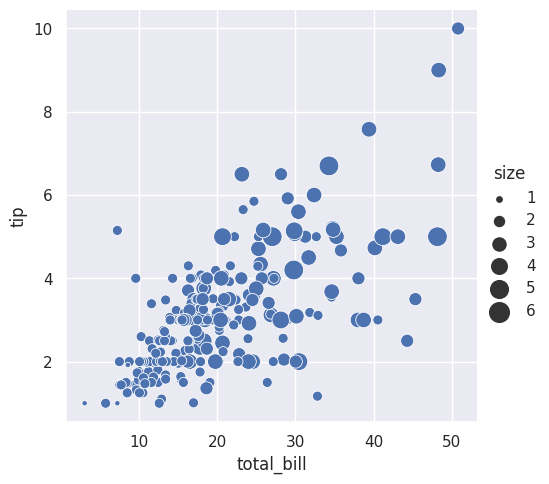

In [ ]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    size='size',
    sizes=(15,200)
)

### Outros Exemplos

In [ ]:
sns.scatterplot?

> Passe uma tupla de valores ou um objeto matplotlib.colors.Normalize para hue_norm para controlar o mapeamento quantitativo de matiz:

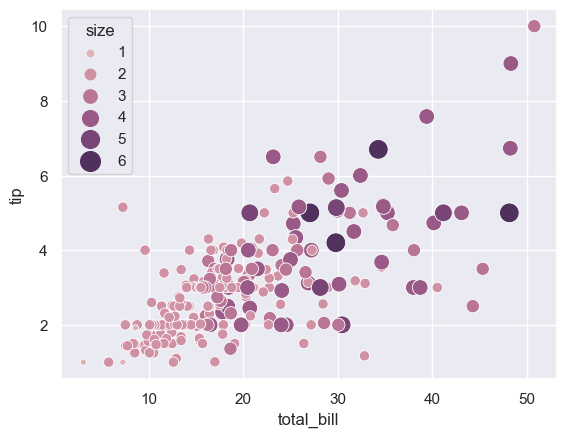

In [ ]:
sns.scatterplot(
    data=tips, x='total_bill', y='tip', hue='size', size='size',
    sizes=(20, 200), hue_norm=(0,7), legend='full'

);

> Controle os marcadores específicos usados para mapear a variável de estilo passando uma lista Python ou um dicionário de códigos de marcadores:

__Tipos de Marcadores__:
<img src="../images/matplotlib_markers.png">

In [ ]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

<Axes: xlabel='total_bill', ylabel='tip'>

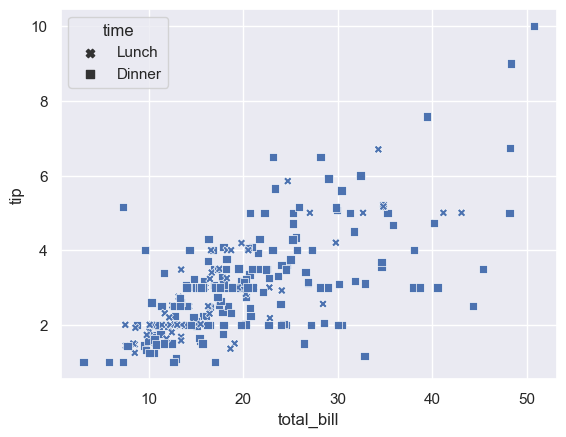

In [ ]:
markers = {'Dinner':'s', 'Lunch':"X"}
sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    style='time',
    markers=markers
)

> Argumentos adicionais de palavras-chave são passados para matplotlib.axes.Axes.scatter(), permitindo definir diretamente os atributos do gráfico que não são mapeados semanticamente:

<Axes: xlabel='total_bill', ylabel='tip'>

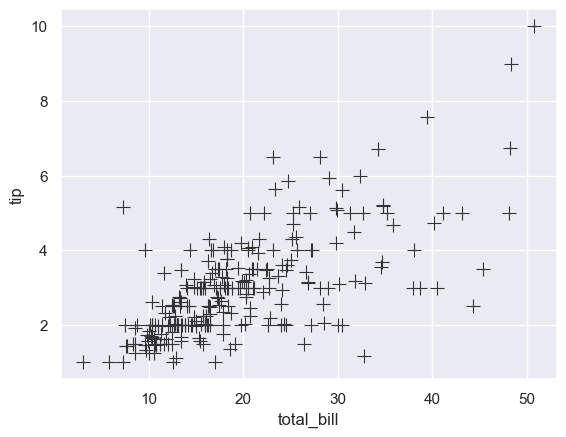

In [ ]:
sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    s=100,
    color=".2",
    marker="+"
)

> Os exemplos anteriores usaram um conjunto de dados de formato longo. Ao trabalhar com dados de formato amplo, cada coluna será plotada em relação ao seu índice usando mapeamen de matiz (__hue__) e estilo (__style__):

<Axes: xlabel='date'>

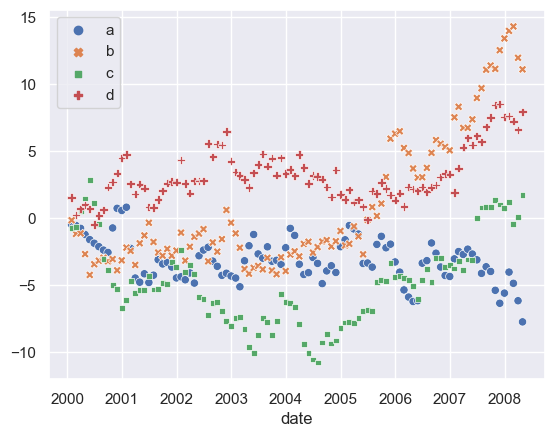

In [ ]:
index = pd.date_range("1 1 2000", periods=100, freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, columns=['a','b','c','d'])
sns.scatterplot(data=wide_df)

Use ```relplot()``` para combinar ```scatterplot()``` e ```FacetGrid```. Isso permite agrupar categóricas variáveis adicionais e plotá-las em vários __subplots__.


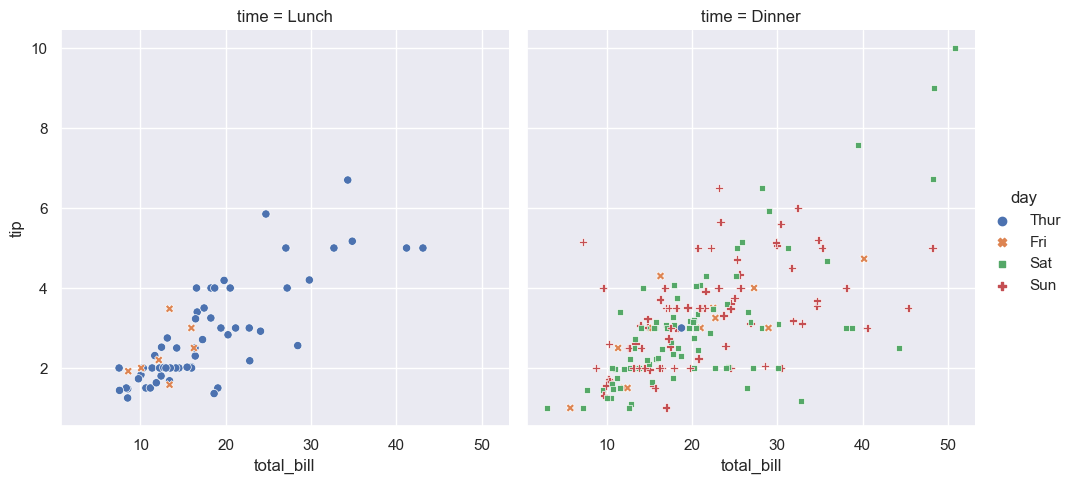

In [ ]:
sns.relplot(
    data= tips, x='total_bill',y='tip',
    col='time', # Lunch ot Dinner
    hue='day',
    style='day',
    kind='scatter',
);

## Enfatizando a continuidade com gráficos de linhas

Os __gráficos de dispersão__ são altamente eficazes, mas não existe um tipo de visualização universalmente ideal. Em vez disso, a representação visual deve ser adaptada às especificidades do conjunto de dados e à pergunta que você está tentando responder com o gráfico.

Com alguns conjuntos de dados, você pode querer entender as mudanças em uma variável em função do tempo ou em uma variável contínua semelhante. Nessa situação, uma boa opção é traçar um __gráfico de linhas__. No Seaborn, isso pode ser feito pela função ```lineplot()```, diretamente ou com ```relplot()``` definindo __kind="line"__:

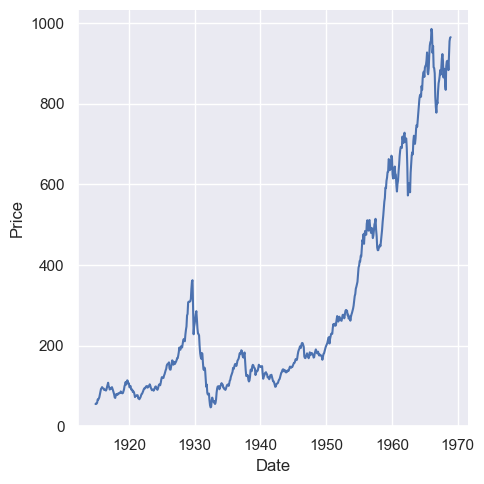

In [ ]:
# Obtendo dataser
dowjones=sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x='Date', y='Price', kind='line')

## Agregação e representação de incerteza

Conjuntos de dados mais complexos terão múltiplas medições para o mesmo valor da variável x. O comportamento padrão no __seborn__ é agregar as múltiplas medições em cada valor de x traçando a média e o intervalo de confiança de 95% em torno da média:

### Dataset fmri

In [ ]:
fmri = sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


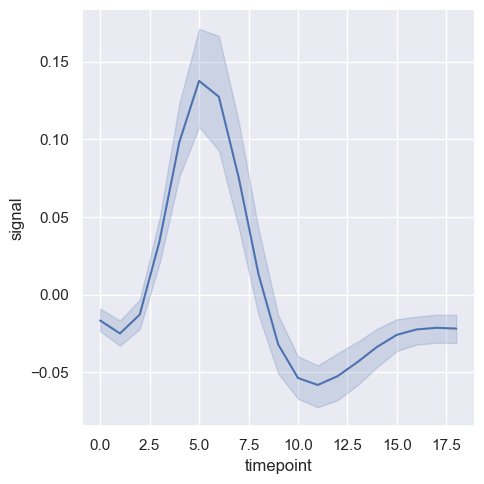

In [ ]:
sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    kind='line'
)

> Os intervalos de confiança são calculados usando bootstrapping, que pode consumir muito tempo para conjuntos de dados maiores. Portanto, é possível desativá-los

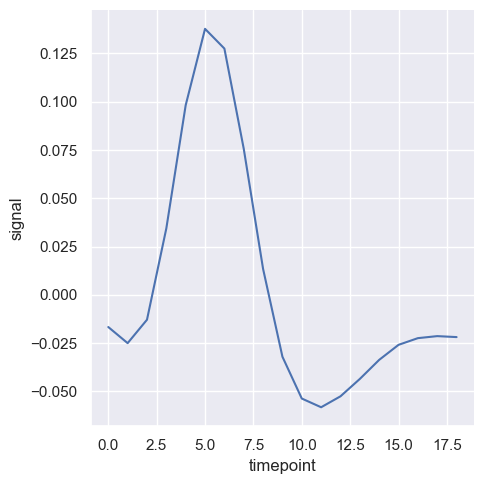

In [ ]:
sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    kind='line',
    errorbar=None
)

> Outra boa opção, especialmente com dados maiores, é representar a dispersão da distribuição em cada ponto no tempo traçando o desvio padrão em vez de um intervalo de confiança:

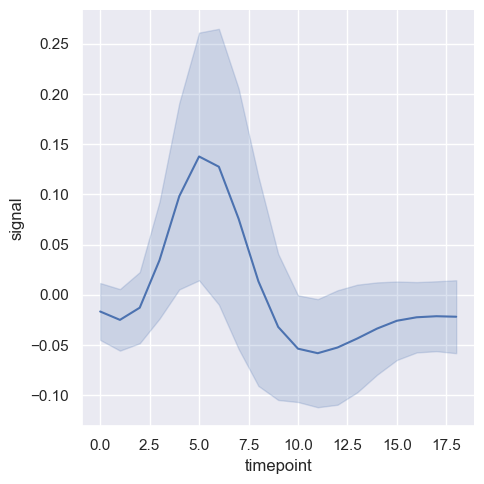

In [ ]:
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    kind='line',
    errorbar='sd'
)

## Plotando subconjuntos de dados com mapeamentos semânticos

A função __lineplot()__ tem a mesma flexibilidade que __scatterplot()__: ela pode mostrar até três variáveis adicionais modificando o matiz, tamanho e estilo dos elementos do gráfico. Isso é feito usando a mesma API de __scatterplot()__, o que significa que não precisamos parar e pensar sobre os parâmetros que controlam a aparência das linhas versus pontos no matplotlib.

Usar a semântica em __lineplot()__ também determinará como os dados serão agregados. Por exemplo, adicionar uma semântica de matiz com dois níveis divide o gráfico em duas linhas e faixas de erro, colorindo cada uma para indicar a qual subconjunto de dados elas correspondem.

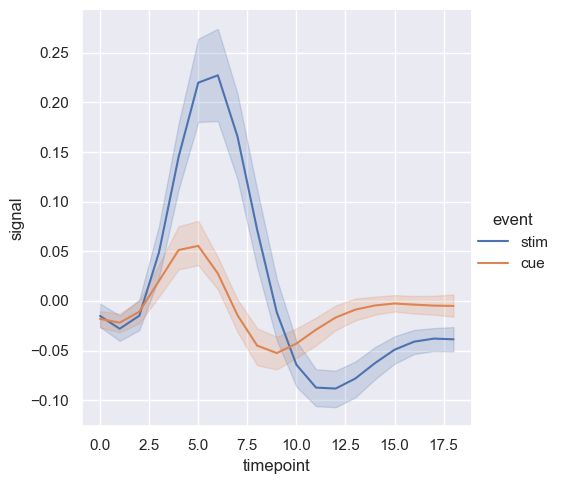

In [ ]:
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    kind='line',
    hue='event'
)

> Adicionar uma semântica de estilo a um gráfico de linha altera o padrão de traços na linha por padrão:

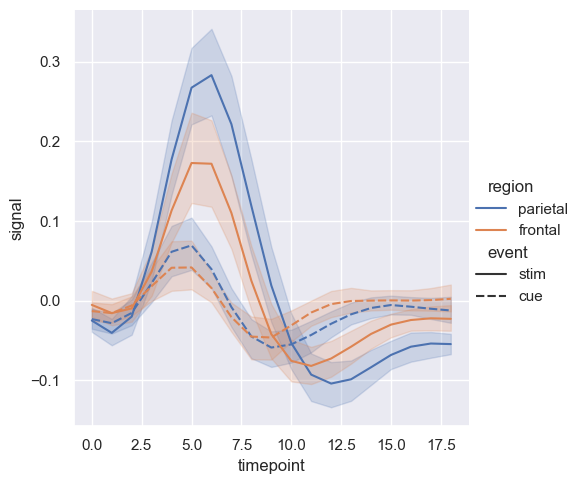

In [ ]:
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    kind='line',
    hue='region',
    style='event'
)

> Mas você pode identificar subconjuntos pelos marcadores usados em cada observação, seja junto com os traços ou em vez deles:

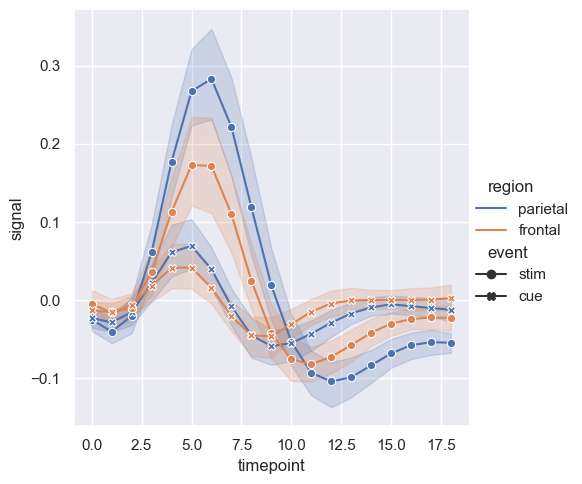

In [ ]:
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    hue='region',
    style='event',
    kind='line',
    dashes=False,
    markers=True
)

> Tal como acontece com os gráficos de dispersão, tenha cuidado ao criar gráficos de linhas usando semântica múltipla. Embora às vezes informativos, eles também podem ser difíceis de analisar e interpretar. Mas mesmo quando você está examinando apenas alterações em uma variável adicional, pode ser útil alterar a cor e o estilo das linhas. Isso pode tornar o gráfico mais acessível quando impresso em preto e branco ou visualizado por alguém com daltonismo:

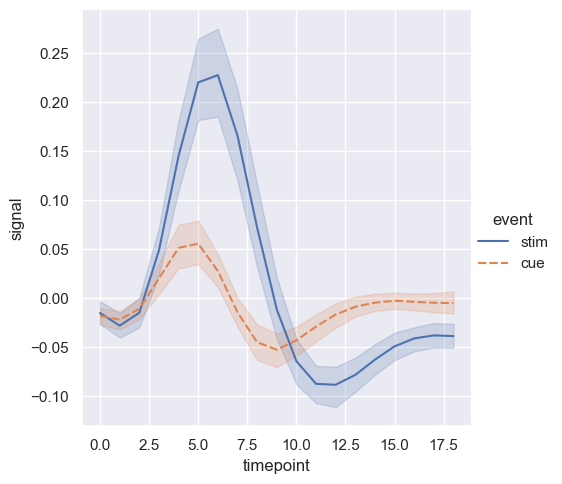

In [ ]:
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    hue='event',
    style='event',
    kind='line'
)

> O mapa de cores padrão e o tratamento da legenda em lineplot() também dependem se a semântica de matiz é categórica ou numérica:

In [ ]:
dots = sns.load_dataset('dots').query("align=='dots'")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


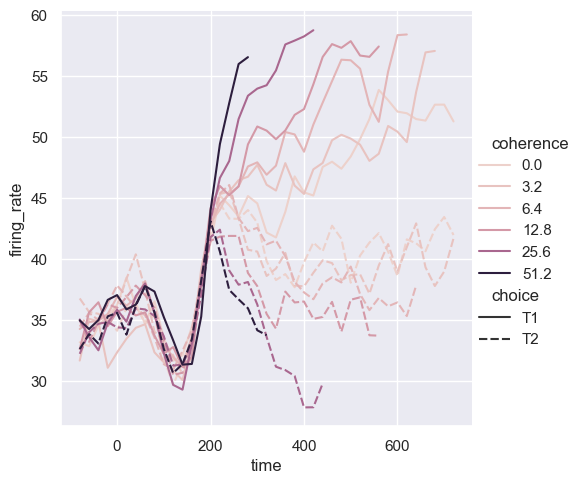

In [ ]:
sns.relplot(
    data=dots,
    x='time',
    y='firing_rate',
    hue='coherence',
    style='choice',
    kind='line'
)

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
482,0,3,male,50.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
711,0,1,male,NaN,0,0,26.5500,S,First,man,True,C,Southampton,no,True
606,0,3,male,30.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
585,1,1,female,18.0,0,2,79.6500,S,First,woman,False,E,Southampton,yes,False


In [ ]:
titanic['age'].isnull().sum()

177

## Mostrando vários relacionamentos com facetas

Enfatizamos neste tutorial que, embora essas funções possam mostrar diversas variáveis semânticas ao mesmo tempo, nem sempre é eficaz fazê-lo. Mas e quando você quiser entender como um relacionamento entre duas variáveis depende de mais de uma outra variável?

A melhor abordagem pode ser fazer mais de um gráfico. Como `relplot() `é baseado no `FacetGrid`, isso é fácil de fazer. Para mostrar a influência de uma variável adicional, em vez de atribuí-la a um dos papéis semânticos do enredo, use-a para “facetar” a visualização. Isso significa que você cria vários eixos e plota subconjuntos de dados em cada um deles:




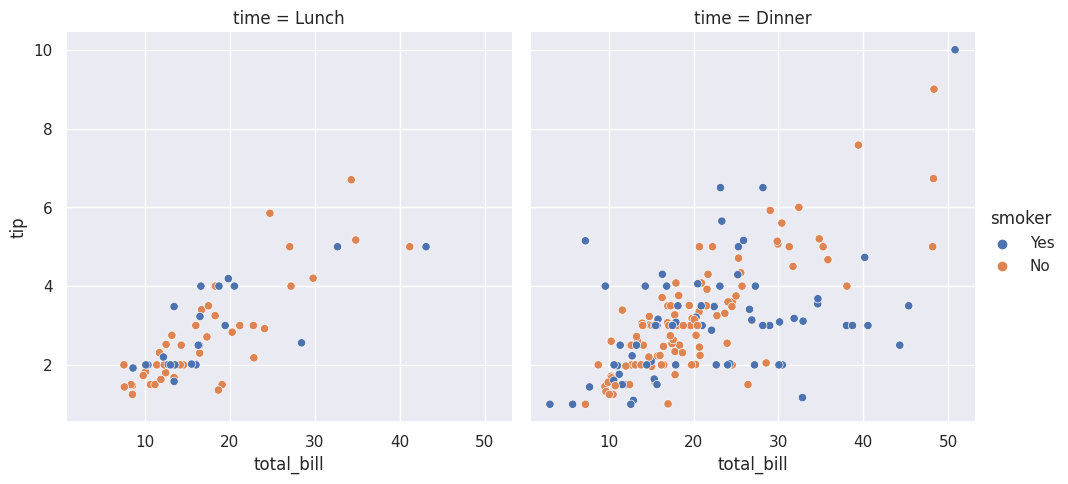

In [7]:
sns.relplot(
#    kind='line',
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker',
    col='time'  # cria um grafico para cada tipo de time
)